In [43]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import ssl
import certifi
import urllib.request

In [57]:
context = ssl.create_default_context(cafile=certifi.where())
url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components"
tables = pd.read_html(urllib.request.urlopen(url, context=context))

dow_jones_constituents = tables[1]
dow_jones_constituents.to_csv('dow_jones_constituents.csv', index=False)

In [45]:
SP_constituents.loc[SP_constituents['Symbol'] == 'BRK.B', 'Symbol'] = 'BRK-B'

SP_constituents.loc[SP_constituents['Symbol'] == 'BF.B', 'Symbol'] = 'BF-B'

In [59]:
# Fetch 10 years of daily adjusted close prices for each constituent
start_date = (datetime.now() - timedelta(days=10*365)).strftime('%Y-%m-%d')

dataframes = []
failed_symbols = []
for symbol in dow_jones_constituents['Symbol']:
    try:
        data = yf.download(symbol, start=start_date)
        data = data[['Adj Close']]
        data.columns = [symbol]
        dataframes.append(data)
    except Exception as e:
        print(f"Failed to fetch data for {symbol}")
        failed_symbols.append(symbol)
        

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [60]:
# Saving the symbols for which data fetching failed to a text file.
with open('failed_symbols.txt', 'w') as f:
    for symbol in failed_symbols:
        f.write("%s\n" % symbol)

dow_jones_data = pd.concat(dataframes, axis=1)
dow_jones_data.to_csv('dow_jones_data.csv')

# Load the data from the CSV files into a DataFrame and handle missing data
constituents = pd.read_csv('dow_jones_constituents.csv')
data = pd.read_csv('dow_jones_data.csv', index_col=0)
data_filled = data.ffill()

# Store the DataFrame
%store data_filled

constituents.head()
data_filled.head()

Stored 'data_filled' (DataFrame)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/extensions/storemagic.py:229: UserWarning:

This is now an optional IPython functionality, setting autorestore/data_filled requires you to install the `pickleshare` library.



,MMM,AXP,AMGN,AMZN,AAPL,BA,CAT,CVX,CSCO,KO,...,MRK,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-03,83.659683,75.458878,105.066719,16.136999,22.113327,109.876221,74.289146,76.882423,18.647512,31.308765,...,42.151711,39.407814,40.330486,63.143093,58.201622,75.281357,73.888237,30.197311,49.414055,21.029335
2014-10-06,83.761154,75.346329,103.903999,16.110001,22.113327,109.789238,74.754448,77.130600,18.426489,31.745636,...,41.926529,39.407814,39.852547,62.977325,58.042328,75.472633,73.089371,30.422070,49.367435,21.037500
2014-10-07,82.173561,73.891853,102.710945,15.849000,21.920214,107.232773,72.237236,75.778587,18.153883,31.978632,...,41.138386,38.929008,39.338860,62.668354,56.658474,74.643799,72.316307,30.179089,48.495651,21.023893
2014-10-08,84.399788,75.675323,105.761406,16.135000,22.375267,108.676239,73.724648,77.039146,18.168615,32.437336,...,42.348743,39.997791,39.678337,63.437004,57.644096,75.273376,74.403580,30.633642,49.500298,21.279560
2014-10-09,82.746521,74.359344,103.881310,15.768500,22.424101,106.745827,71.321823,74.792336,17.822336,31.942221,...,41.666153,39.202618,38.963642,63.045139,56.877499,74.827080,72.960564,30.056236,48.416382,21.176207


In [61]:
# Calculate the daily returns for each stock
daily_returns = data_filled.pct_change()

daily_returns.head()

,MMM,AXP,AMGN,AMZN,AAPL,BA,CAT,CVX,CSCO,KO,...,MRK,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-06,0.001213,-0.001492,-0.011066,-0.001673,0.000000,-0.000792,0.006263,0.003228,-0.011853,0.013954,...,-0.005342,0.000000,-0.011851,-0.002625,-0.002737,0.002541,-0.010812,0.007443,-0.000943,0.000388
2014-10-07,-0.018954,-0.019304,-0.011482,-0.016201,-0.008733,-0.023285,-0.033673,-0.017529,-0.014794,0.007339,...,-0.018798,-0.012150,-0.012890,-0.004906,-0.023842,-0.010982,-0.010577,-0.007987,-0.017659,-0.000647
2014-10-08,0.027092,0.024136,0.029699,0.018045,0.020760,0.013461,0.020591,0.016635,0.000812,0.014344,...,0.029422,0.027455,0.008630,0.012265,0.017396,0.008434,0.028863,0.015062,0.020716,0.012161
2014-10-09,-0.019589,-0.017390,-0.017777,-0.022715,0.002182,-0.017763,-0.032592,-0.029165,-0.019059,-0.015264,...,-0.016118,-0.019880,-0.018012,-0.006177,-0.013299,-0.005929,-0.019394,-0.018849,-0.021897,-0.004857


In [62]:
# Identify the 10 stocks with the lowest returns for each trading day
biggest_losers = daily_returns.apply(lambda day: day.nsmallest(10).index, axis=1)

biggest_losers.head()

Date
2014-10-03    Index(['MMM', 'AXP', 'AMGN', 'AMZN', 'AAPL', '...
2014-10-06    Index(['CSCO', 'NKE', 'AMGN', 'UNH', 'MCD', 'M...
2014-10-07    Index(['CAT', 'CRM', 'JNJ', 'HON', 'BA', 'GS',...
2014-10-08    Index(['CSCO', 'TRV', 'NKE', 'MCD', 'DIS', 'WM...
2014-10-09    Index(['CAT', 'CVX', 'GS', 'DIS', 'JNJ', 'AMZN...
dtype: object

In [75]:
# Initialize capital
capital = 100000

# Create a new dataframe to hold our capital at the end of each day
capital_over_time = pd.DataFrame(index=daily_returns.index)

# Loop over each trading day
for i in range(len(daily_returns.index) - 1):
    # Select the biggest losers for the current day
    losers = biggest_losers.iloc[i]
    
    # Get the closing prices for these stocks on the current and next trading days
    prices_today = data_filled.loc[daily_returns.index[i], losers]
    prices_tomorrow = data_filled.loc[daily_returns.index[i+1], losers]
    
    # Distribute our capital equally among these stocks and buy shares
    shares = (capital / 10) / prices_today
    
    # The next day, sell all shares at the closing price and update our capital
    capital = (shares * prices_tomorrow).sum()
    
    # Store our capital
    capital_over_time.loc[daily_returns.index[i+1], 'Capital'] = capital

capital_over_time.head()

,Capital
Date,
2014-10-03,NaN
2014-10-06,99977.824569
2014-10-07,98614.472404
2014-10-08,100730.251756
2014-10-09,99269.878926


In [76]:
import numpy as np

# Calculate the return of our strategy
returns = capital_over_time['Capital'].pct_change().dropna()

# Calculate annualized return
annualized_return = (1 + returns.mean())**252 - 1

# Calculate annualized volatility
annualized_vol = returns.std() * np.sqrt(252)

# Calculate Sharpe ratio (assuming a risk-free rate of 0)
sharpe_ratio = annualized_return / annualized_vol

# Calculate max drawdown
rolling_max = capital_over_time['Capital'].cummax()
daily_drawdown = capital_over_time['Capital'] / rolling_max - 1.0
max_drawdown = daily_drawdown.cummin()

# Print out the calculated metrics
print('Annualized Return:', annualized_return)
print('Annualized Volatility:', annualized_vol)
print('Sharpe Ratio:', sharpe_ratio)
print('Max Drawdown:', max_drawdown.min())

Annualized Return: 0.16606185658639938
Annualized Volatility: 0.20098598998637804
Sharpe Ratio: 0.826235980914164
Max Drawdown: -0.38214101077729234


In [77]:
# 1. Fetch the daily adjusted close prices for the DIA ETF from Yahoo Finance for the same period as the Dow Jones data.
# 2. Calculate the daily returns for DIA.
# 3. Calculate the Sharpe ratio for DIA (assume a risk-free rate of 0).
# 4. Compare the Sharpe ratio of our mean reversion strategy with that of DIA.
# 5. Print a message indicating whether our strategy outperformed the general Dow Jones based on the Sharpe ratios. 

                                                                                                
# Import yfinance library to fetch data from Yahoo Finance
import yfinance as yf

# Fetch the daily adjusted close prices for the DIA ETF
dia_data = yf.download('DIA', start=daily_returns.index.min(), end=daily_returns.index.max())['Adj Close']

# Calculate the daily returns for DIA
dia_returns = dia_data.pct_change().dropna()

# Calculate annualized return for DIA
dia_annualized_return = (1 + dia_returns.mean())**252 - 1

# Calculate annualized volatility for DIA
dia_annualized_vol = dia_returns.std() * np.sqrt(252)

# Calculate Sharpe ratio for DIA (assuming a risk-free rate of 0)
dia_sharpe_ratio = dia_annualized_return / dia_annualized_vol
print(dia_sharpe_ratio)

# Compare the Sharpe ratio of our mean reversion strategy with that of DIA
if sharpe_ratio > dia_sharpe_ratio:
    print("Our mean reversion strategy outperformed the Dow Jones.")
else:
    print("Our mean reversion strategy didn't outperform the Dow Jones.")

[*********************100%%**********************]  1 of 1 completed

0.7809264679294241
Our mean reversion strategy outperformed the Dow Jones.


In [78]:
# Create a DataFrame to hold performance metrics for both strategies
performance_metrics = pd.DataFrame({
    'Strategy': ['Mean Reversion', 'Dow Jones'],
    'Annualized Return': [annualized_return, dia_annualized_return],
    'Annualized Volatility': [annualized_vol, dia_annualized_vol],
    'Sharpe Ratio': [sharpe_ratio, dia_sharpe_ratio]
})

# Print the DataFrame
print(performance_metrics)

# Compare Sharpe ratios to determine which strategy had the higher risk-adjusted returns
if sharpe_ratio > dia_sharpe_ratio:
    print("The mean reversion strategy had the higher risk-adjusted returns.")
else:
    print("The Dow Jones had the higher risk-adjusted returns.")

         Strategy  Annualized Return  Annualized Volatility  Sharpe Ratio
0  Mean Reversion           0.166062               0.200986      0.826236
1       Dow Jones           0.136407               0.174674      0.780926
The mean reversion strategy had the higher risk-adjusted returns.


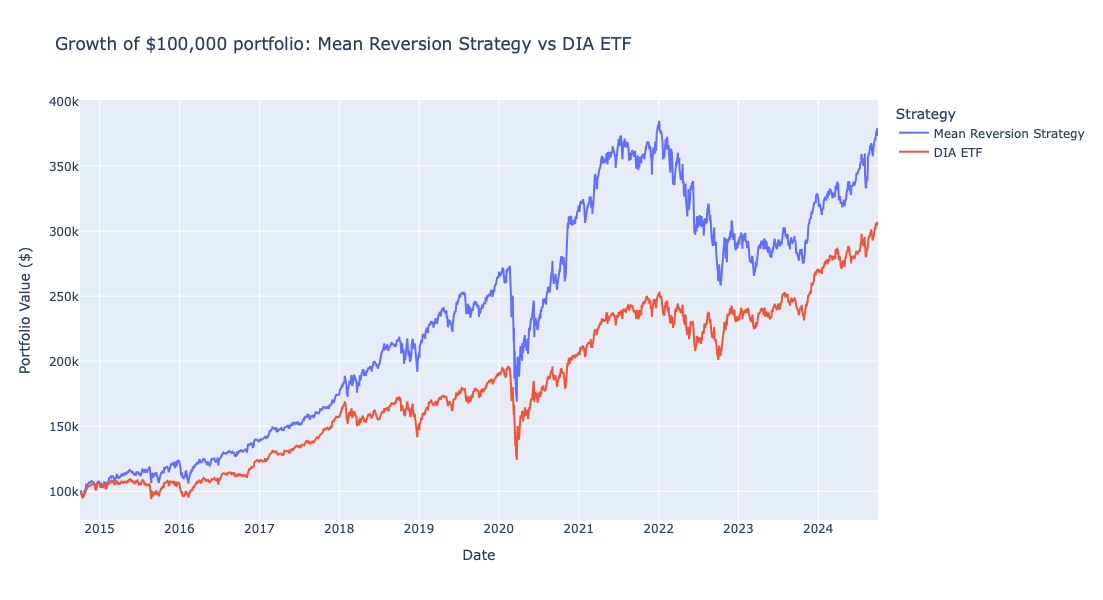

In [79]:
# 1. Calculate the cumulative returns for both our mean reversion strategy and the DIA ETF.
# 2. Multiply the cumulative returns by the initial investment of $100,000 to get the daily portfolio values for both strategies.
# 3. Create a beautiful interactive plot using Plotly to visualize the growth of the $100,000 portfolio over time for both our mean reversion strategy and the SPY ETF.
# 4. Include proper axis labels, a title, and a legend.
# 5. Display the plot. 


# Calculate the cumulative returns for our mean reversion strategy and the DIA ETF
capital_over_time['Capital_Returns'] = capital_over_time['Capital'].pct_change() + 1
dia_cumulative_returns = (dia_data.pct_change() + 1).cumprod()

# Multiply the cumulative returns by the initial investment of $100,000 to get the daily portfolio values
capital_over_time['Portfolio_Value'] = capital_over_time['Capital_Returns'].cumprod() * 100000
dia_portfolio_value = dia_cumulative_returns * 100000

# Create the plot using Plotly
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = capital_over_time.index,
    y = capital_over_time['Portfolio_Value'],
    mode = 'lines',
    name = 'Mean Reversion Strategy'
))

fig.add_trace(go.Scatter(
    x = capital_over_time.index,
    y = dia_portfolio_value,
    mode = 'lines',
    name = 'DIA ETF'
))

# Include proper axis labels, a title, and a legend
fig.update_layout(
    title = "Growth of $100,000 portfolio: Mean Reversion Strategy vs DIA ETF",
    xaxis_title = "Date",
    yaxis_title = "Portfolio Value ($)",
    legend_title = "Strategy",
    height = 600,
    width = 900,
    font = dict(
        size = 12
    )
)

# Display the plot
fig.show()